In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('ifood_df.csv')

In [3]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [4]:
# univariate analysis 

In [5]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [ ]:
sns.displot(df['Income']);

In [ ]:
df.columns

In [8]:
import pandas as pd

# Load the dataset
file_path = "ifood_df.csv"
df = pd.read_csv(file_path)

# Display basic dataset information
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [34]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values


# Handle missing values (if necessary)
df = df.dropna()  # Drop rows with missing values

# Describe numerical features
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Product_Cluster,PCA1,PCA2
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000,2205.000000,2.205000e+03,2.205000e+03
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932,0.691610,2.577933e-17,-2.577933e-17
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044,0.461933,1.848302e+00,8.650758e-01
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000,0.000000,-1.814686e+00,-3.475502e+00
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000,0.000000,-1.540079e+00,-3.708650e-01
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000,1.000000,-7.812444e-01,-2.117782e-01
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000,1.000000,1.278570e+00,3.376425e-01
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000,1.000000,6.523920e+00,4.362810e+00


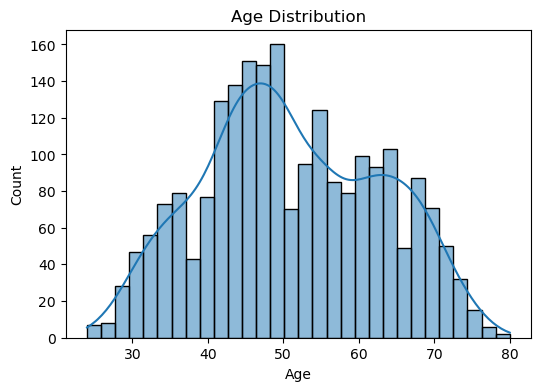

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Age
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

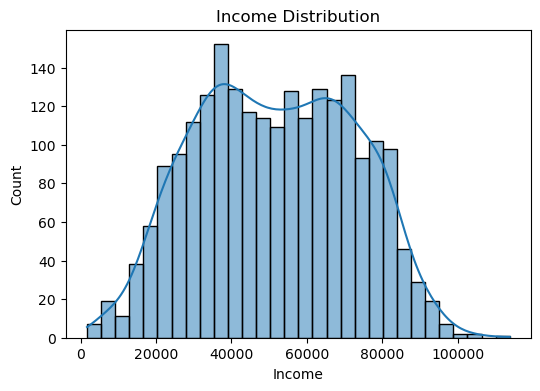

In [36]:
# Distribution of Income
plt.figure(figsize=(6,4))
sns.histplot(df['Income'], bins=30, kde=True)
plt.title("Income Distribution")
plt.show()

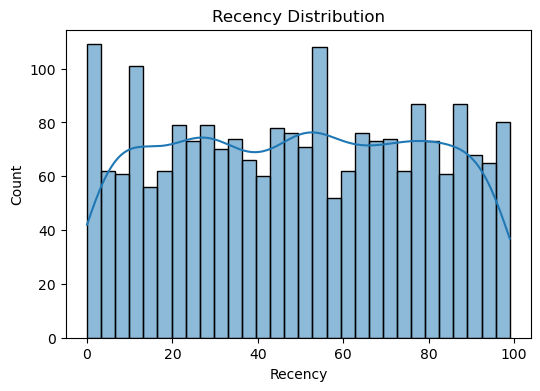

In [37]:
# Recency Analysis
plt.figure(figsize=(6,4))
sns.histplot(df['Recency'], bins=30, kde=True)
plt.title("Recency Distribution")
plt.show()

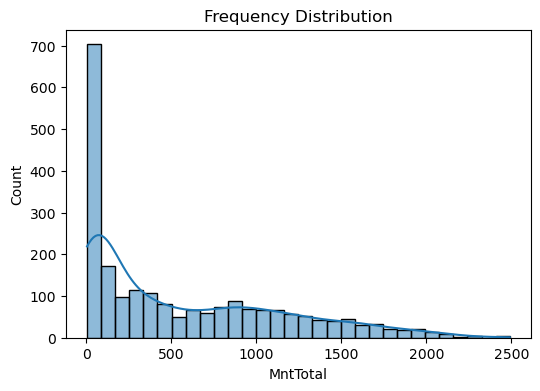

In [38]:
# Frequency Analysis
plt.figure(figsize=(6,4))
sns.histplot(df['MntTotal'], bins=30, kde=True)
plt.title("Frequency Distribution")
plt.show()



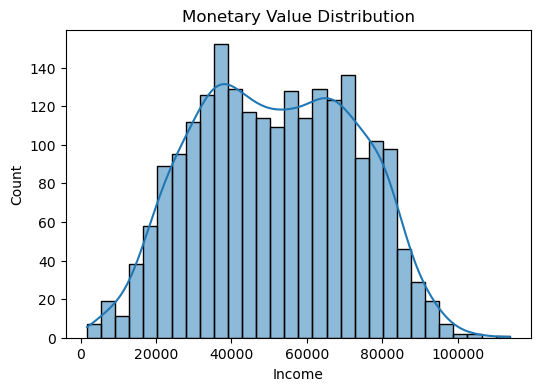

In [39]:
# Monetary Analysis
plt.figure(figsize=(6,4))
sns.histplot(df['Income'], bins=30, kde=True)
plt.title("Monetary Value Distribution")
plt.show()

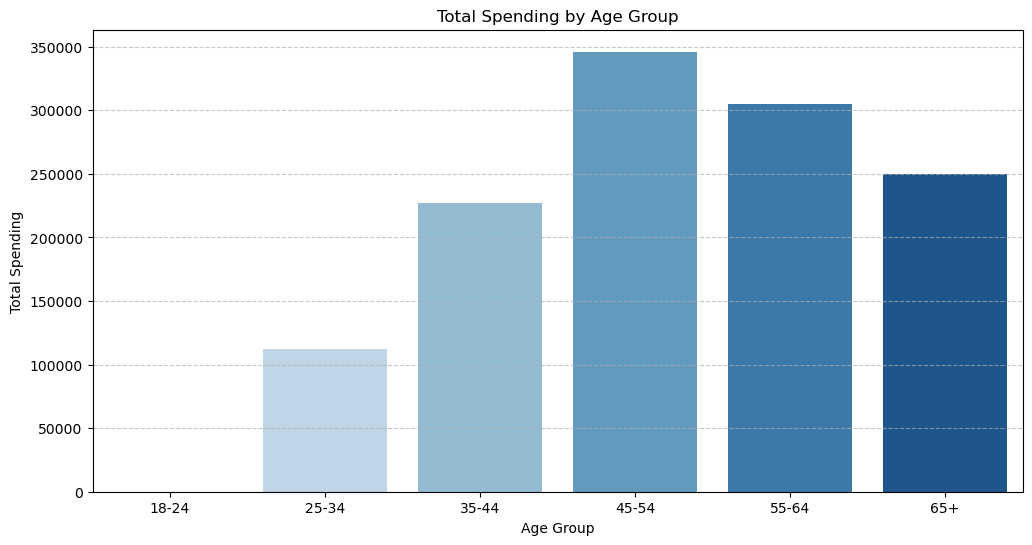

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define age groups
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calculate total spending for each age group
age_group_spending = df.groupby('Age_Group')['MntTotal'].sum().reset_index()

# Plot spending by age group
plt.figure(figsize=(12, 6))
sns.barplot(data=age_group_spending, x='Age_Group', y='MntTotal', palette='Blues')
plt.title('Total Spending by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Spending')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# kmeans clustering 

#### Demographics and Rfm Analysis


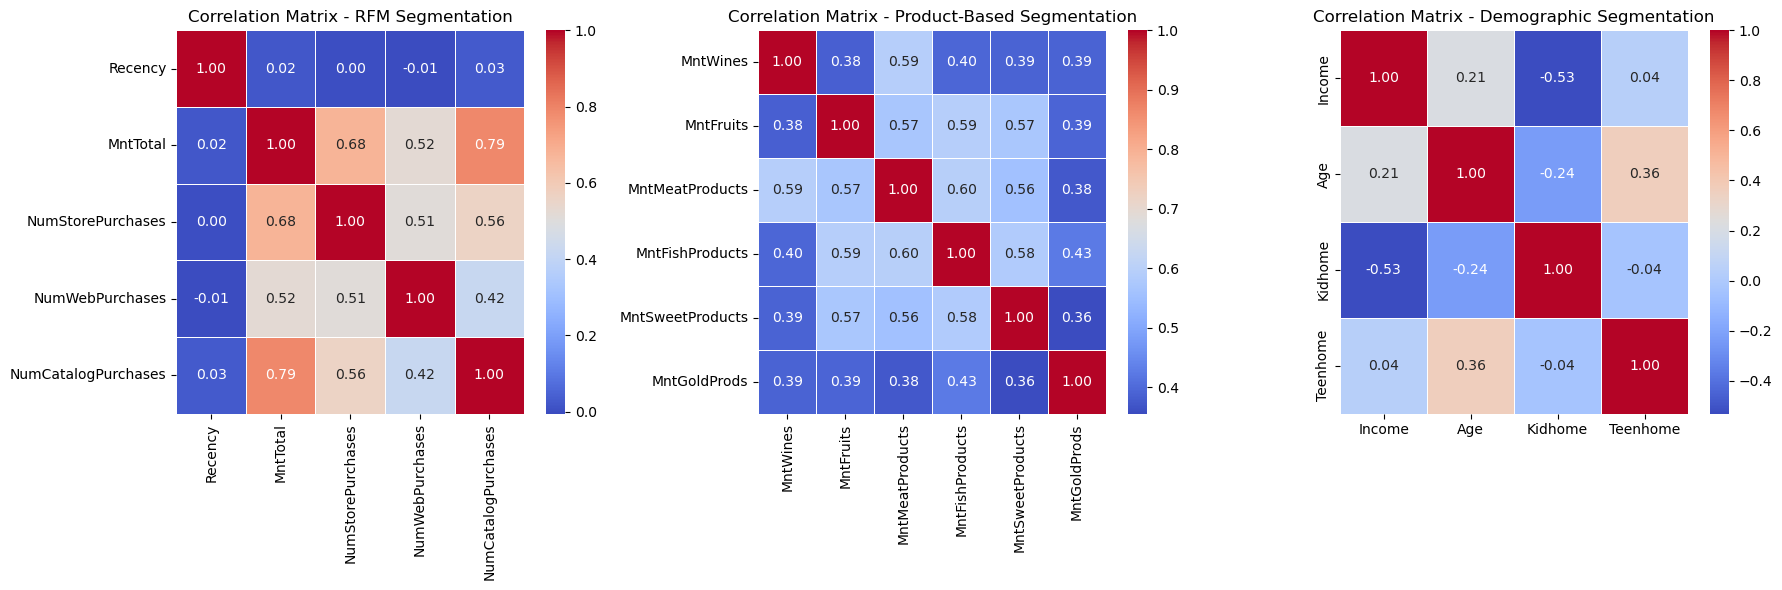

Top Correlations:
MntWines             MntTotal               0.902310
MntTotal             MntWines               0.902310
                     MntMeatProducts        0.861392
MntMeatProducts      MntTotal               0.861392
Income               MntTotal               0.823066
MntTotal             Income                 0.823066
NumCatalogPurchases  MntTotal               0.791187
MntTotal             NumCatalogPurchases    0.791187
Income               MntWines               0.730495
MntWines             Income                 0.730495
dtype: float64


In [42]:
# Selecting relevant columns for each segmentation
rfm_cols = ["Recency", "MntTotal", "NumStorePurchases", "NumWebPurchases", "NumCatalogPurchases"] 
product_cols = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
demographic_cols = ["Income", "Age", "Kidhome", "Teenhome"]

# Combine all selected columns into one DataFrame
selected_cols = rfm_cols + product_cols + demographic_cols
df_selected = df[selected_cols]

# Compute correlation matrices
correlation_rfm = df[rfm_cols].corr()
correlation_product = df[product_cols].corr()
correlation_demographic = df[demographic_cols].corr()

# Plot heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(correlation_rfm, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, ax=axes[0])
axes[0].set_title("Correlation Matrix - RFM Segmentation")

sns.heatmap(correlation_product, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, ax=axes[1])
axes[1].set_title("Correlation Matrix - Product-Based Segmentation")

sns.heatmap(correlation_demographic, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, ax=axes[2])
axes[2].set_title("Correlation Matrix - Demographic Segmentation")

plt.tight_layout()
plt.show()

# Display top correlated features
correlation_unstacked = df_selected.corr().unstack().sort_values(ascending=False)
print("Top Correlations:")
print(correlation_unstacked[correlation_unstacked < 1].head(10))  # Exclude self-correlations

# KMeans Clustering on Product-Based Segmentation
scaler = StandardScaler()
df_product_scaled = scaler.fit_transform(df[product_cols])

# Determine the optimal number of clusters using the Elbow Method and Silhouette Score
wcss = []
silhouette_scores = []
k_range = range(2, 11)  # Silhouette score requires at least 2 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_product_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_product_scaled, cluster_labels))



In [ ]:
we will be doing the RFM AND DEMOGRAPHICS ANALYSIS. 

In [56]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
demographic_features = df[['Age', 'Income']]

# Standardize the data
scaler = StandardScaler()
demographic_scaled = scaler.fit_transform(demographic_features)

# Apply K-Means clustering
kmeans_demo = KMeans(n_clusters=4, random_state=42)
df['DemoSegment'] = kmeans_demo.fit_predict(demographic_scaled)

In [61]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()



# Define RFM metrics
df['Recency'] = (df['Recency'])  # Days since last purchase
df['Frequency'] = df['MntTotal']  # Number of purchases
df['Monetary'] = df['Income']  # Assuming income correlates with spending power

rfm_features = df[['Recency', 'Frequency', 'Monetary']]

# Standardize the data
rfm_scaled = scaler.fit_transform(rfm_features)

# Apply K-Means clustering
kmeans_rfm = KMeans(n_clusters=2, random_state=42)
df['RFMSegment'] = kmeans_rfm.fit_predict(rfm_scaled)

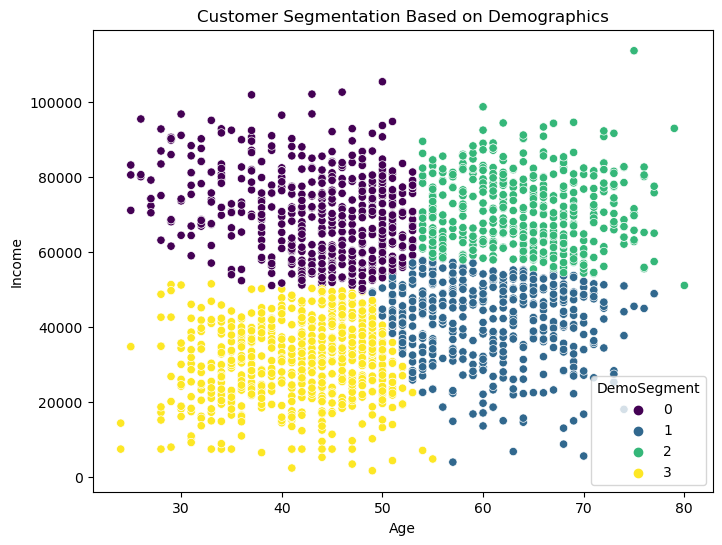

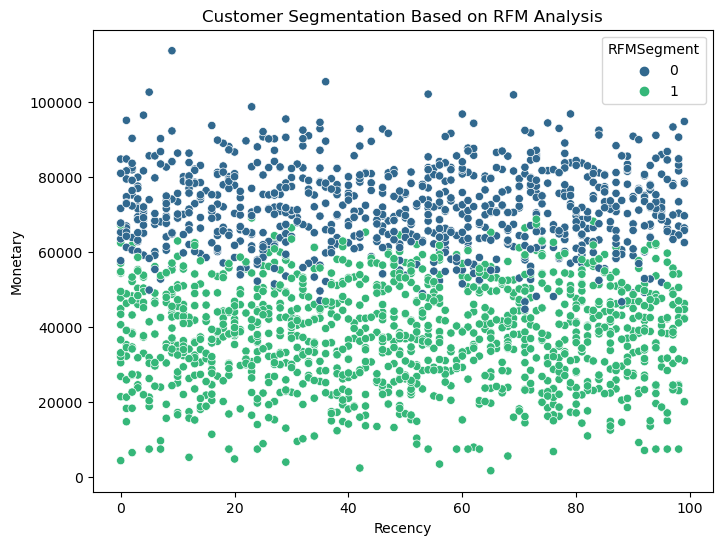

In [62]:
# Scatter plot for demographics segmentation
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Age'], y=df['Income'], hue=df['DemoSegment'], palette='viridis')
plt.title("Customer Segmentation Based on Demographics")
plt.show()

# Scatter plot for RFM segmentation
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Recency'], y=df['Monetary'], hue=df['RFMSegment'], palette='viridis')
plt.title("Customer Segmentation Based on RFM Analysis")
plt.show()

## RESULTS

RFM-Based Insights:

Segment 1: Recent, high-frequency, high-monetary spenders → VIP customers (offer loyalty rewards).

Segment 2: Frequent but low-monetary spenders → Upsell strategies may work.

Segment 3: High monetary, low-frequency → Engage with targeted promotions.

Segment 4: Infrequent and low-spending → Re-engagement strategies needed.

 Insights & Recommendations

Demographics-Based Insights:

Segment 1: Younger customers with high income → Potential high-value customers.

Segment 2: Older customers with moderate income → Stable, long-term customers.

Segment 3: Large families with low income → Budget-conscious buyers.

Segment 4: Smaller families with high income → Likely luxury product buyers.